**The Iris flower classification dataset comprises 150 samples of Iris flowers**
**The dataset is widely used as a benchmark in machine learning for supervised classification tasks aiming to accurately classify Iris flowers based on their measurements.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import warnings 
warnings.filterwarnings('ignore')

**LOAD THE DATASET**

In [4]:
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**EXPLORATRY DATA ANALYSIS PART**

In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.select_dtypes(include = 'object').sample(6)

,Species
91,Iris-versicolor
6,Iris-setosa
33,Iris-setosa
98,Iris-versicolor
78,Iris-versicolor
0,Iris-setosa


In [8]:
#Count object data type variable
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
#Descriptive statistics of this dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


 **CORRELATION BETWEEN VARIABLE**

In [10]:
subset_df = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
subset_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
corr_df = subset_df.corr()
corr_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**ENCODING THE SPECIES**

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['Species'])

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


**DATA VISUALIZATION PART**

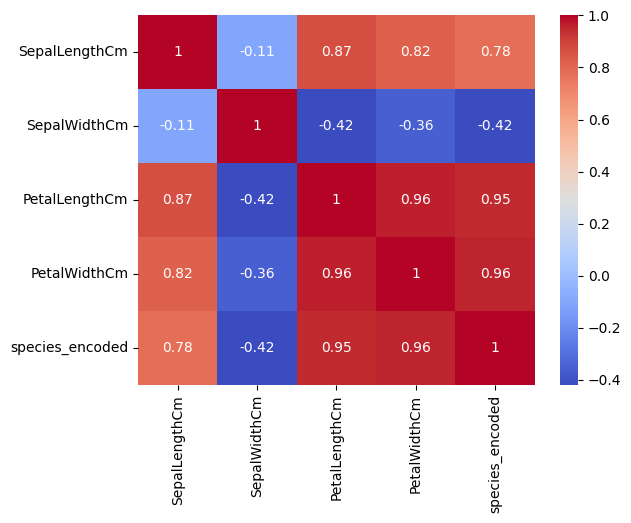

In [14]:
sns.heatmap(df.drop(columns=['Id','Species']).corr(), annot=True, cmap='coolwarm')
plt.show()

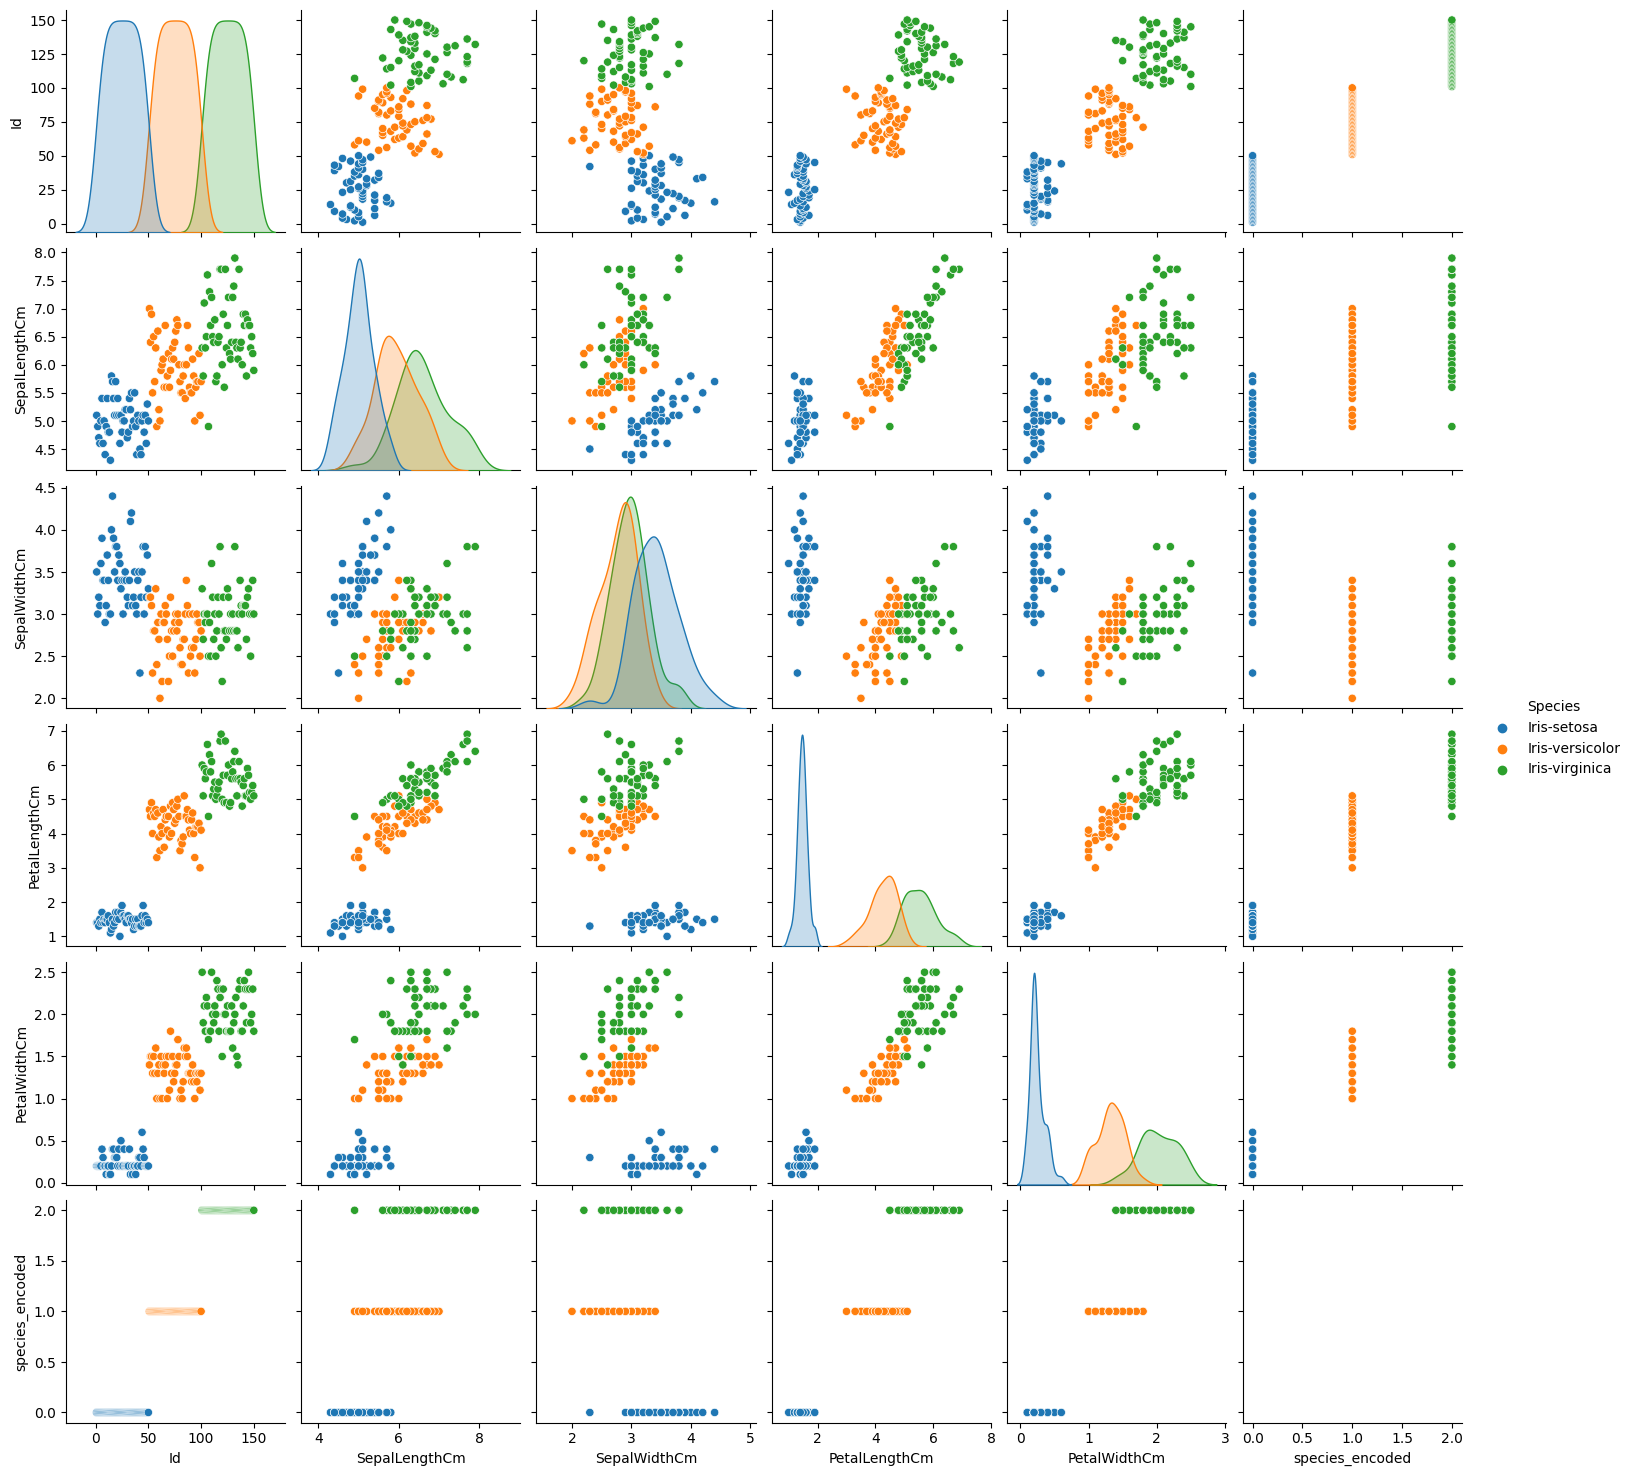

In [15]:
sns.pairplot(df, hue='Species')

**SELECTION OF MODEL**

In [16]:
from sklearn.model_selection import train_test_split

# Drop the 'Id' and 'Species' columns to get the features (x) and target (y)
x = df.drop(columns=['Id', 'Species'])
y = df['Species']

# Perform the train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)

**LOGISTIC/PROBABILISTIC REGRESSION MODEL**

In [17]:
# Import the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
logistic_regression_model = LogisticRegression()

# Fit (train) the model on the training data
logistic_regression_model.fit(x_train, y_train)

# Calculate and print the model's accuracy on the test data
accuracy = logistic_regression_model.score(x_test, y_test)
print("Model's accuracy:", accuracy * 100)

Model's accuracy: 100.0
